In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
import random as rand

# Python中的数据拟合

In [2]:
x = np.linspace(0, 1.0, 11)
y=0.5*x+1
yn=np.zeros(11)
for i in range(11):
    yn[i]=y[i]+0.2*(rand.random()-0.5)

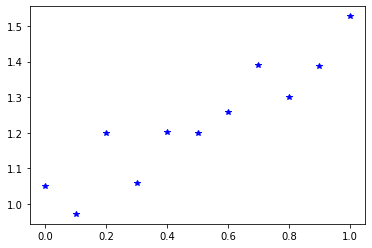

In [3]:
plt.plot(x,yn,'b*')

1:  [0.2880998  1.02679643 0.17330681]


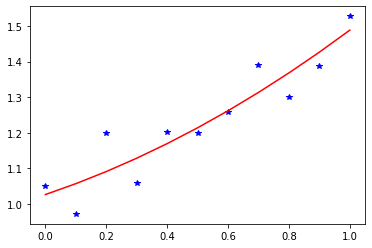

In [5]:
def func(x, a, b,c):
    return a*x+b+c*x**2
popt, pcov= curve_fit(func, x, yn)
print("1: ",popt)
a=popt[0]
b=popt[1]
c=popt[2]
plt.plot(x,yn,'b*',x,func(x,a,b,c),'r-')

1:  [0.46140661 1.00080041]


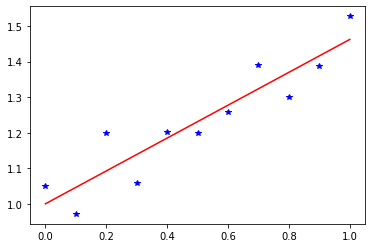

In [6]:
def func(x, a, b):
    return a*x+b
popt, pcov= curve_fit(func, x, yn)
print("1: ",popt)
a=popt[0]
b=popt[1]
plt.plot(x,yn,'b*',x,func(x,a,b),'r-')

# 法线方程

In [18]:
def ls(A, b):
    return np.linalg.inv(np.dot(A.T, A)).dot(A.T).dot(b)

def coef(x_i, y_i, degree):
    n = len(x_i)
    
    A = np.zeros((degree, n), dtype=x_i.dtype)
    for i in range(degree):
        A[i] = x_i**i
    A = A.T
    b = y_i
    
    return ls(A, b)

def fit(x_i, y_i, degree):
    c = coef(x_i, y_i, degree)

    def f(x):
        ans = 0
        for i in range(degree):
            ans += c[i] * (x**i)
        return ans
    
    return f

In [19]:
import numpy as np
A = np.array([[1,-2], [1,0], [1,1],[1,2]])
Ap=np.array([[-2,1], [0,1], [1,1],[2,1]])
b=np.array([0,np.log(2),np.log(2),np.log(5)])
ls(A,b)

array([0.65855907, 0.36149599])

In [12]:
1.3/1.972

0.6592292089249493

In [13]:
q,r = np.linalg.qr(Ap)
print(q)
print(r)

[[-0.66666667 -0.61977979]
 [ 0.         -0.50709255]
 [ 0.33333333 -0.45074894]
 [ 0.66666667 -0.39440532]]
[[ 3.          0.33333333]
 [ 0.         -1.97202659]]


# 例1

In [20]:
import numpy as np
xi = np.array([0,1,2,3,4], dtype=float)
yi = np.array([-1,-2,-5,4,7],dtype=float)

In [23]:
d=2
c1=coef(xi,yi,d+1)
print(c1)
f=fit(xi,yi,d+1)
print(f(xi))
error=np.sqrt(sum((yi-f(xi))**2))
print(error)

[-0.94285714 -3.51428571  1.42857143]
[-0.94285714 -3.02857143 -2.25714286  1.37142857  7.85714286]
4.028470110174759


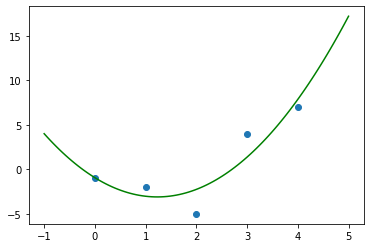

In [24]:
import matplotlib.pyplot as plt
plt.scatter(xi, yi)
x_range=np.linspace(-1,5,100)
plt.plot(x_range, f(x_range), c='g')
plt.show()

In [25]:
d=4
c1=coef(xi,yi,d+1)
print(c1)
f=fit(xi,yi,d+1)
print(f(xi))
error=np.sqrt(sum((yi-f(xi))**2))
print(error)

[ -1.          12.66666667 -22.66666667  10.33333333  -1.33333333]
[-1. -2. -5.  4.  7.]
4.40821399058208e-11


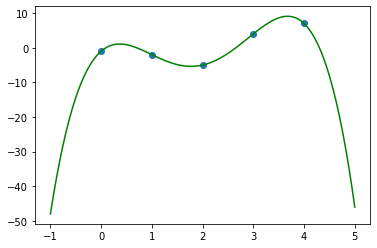

In [26]:
import matplotlib.pyplot as plt
plt.scatter(xi, yi)
x_range=np.linspace(-1,5,100)
plt.plot(x_range, f(x_range), c='g')
plt.show()

# 条件数

In [27]:
import numpy as np
def cond(A):  # inf-范数
    return abs(A).sum(axis=1).max() * abs(np.linalg.inv(A)).sum(axis=1).max()

def Vand(xi):
    n=xi.size
    VM=np.zeros((n,n))
    
    for i in range(n):
        for j in range(n):
            VM[i,j]=xi[i]**j
    return VM
 
xi=np.linspace(1, 10, 7)
print(xi)
print(Vand(xi))
print(cond(Vand(xi)))
print(cond(Vand(xi).T))
print(cond(Vand(xi).dot(Vand(xi).T)))

[ 1.   2.5  4.   5.5  7.   8.5 10. ]
[[1.00000000e+00 1.00000000e+00 1.00000000e+00 1.00000000e+00
  1.00000000e+00 1.00000000e+00 1.00000000e+00]
 [1.00000000e+00 2.50000000e+00 6.25000000e+00 1.56250000e+01
  3.90625000e+01 9.76562500e+01 2.44140625e+02]
 [1.00000000e+00 4.00000000e+00 1.60000000e+01 6.40000000e+01
  2.56000000e+02 1.02400000e+03 4.09600000e+03]
 [1.00000000e+00 5.50000000e+00 3.02500000e+01 1.66375000e+02
  9.15062500e+02 5.03284375e+03 2.76806406e+04]
 [1.00000000e+00 7.00000000e+00 4.90000000e+01 3.43000000e+02
  2.40100000e+03 1.68070000e+04 1.17649000e+05]
 [1.00000000e+00 8.50000000e+00 7.22500000e+01 6.14125000e+02
  5.22006250e+03 4.43705312e+04 3.77149516e+05]
 [1.00000000e+00 1.00000000e+01 1.00000000e+02 1.00000000e+03
  1.00000000e+04 1.00000000e+05 1.00000000e+06]]
115956295.87790553
108946226.21287093
8275520925647422.0


# QR分解

In [35]:
A = np.array([[4, 0], [3, 1],[6,6]])
A = np.array([[1, 0], [1, 1],[1,2]])
q,r = np.linalg.qr(A)
print(q)
print(r)

[[-5.77350269e-01  7.07106781e-01]
 [-5.77350269e-01  4.43378006e-17]
 [-5.77350269e-01 -7.07106781e-01]]
[[-1.73205081 -1.73205081]
 [ 0.         -1.41421356]]


In [36]:
(q.T).dot(q)

array([[1.00000000e+00, 3.39032612e-18],
       [3.39032612e-18, 1.00000000e+00]])

In [37]:
q.dot(r)

array([[1., 0.],
       [1., 1.],
       [1., 2.]])